#  Introduction To Material Science

## Table of Contents:
* [Introduction](#introduction)
* [Setup](#setup)
* [Featurizers](#featurizers)
    - [Crystal Featurizers](#crystal-featurizers)
    - [Compound Featurizers](#compound-featurizers)
* [Datasets](#datasets)
* [Predicting structural properties of a crystal](#pred-props)
* [Further Reading](#further-reading)

## Introduction <a class="anchor" id="introduction"></a>

One of the most exciting applications of machine learning in the recent time is it's application to material science domain. DeepChem helps in development and application of machine learning to solid-state systems. As a starting point of applying machine learning to material science domain, DeepChem provides material science datasets as part of the MoleculeNet suite of datasets, data featurizers and implementation of popular machine learning algorithms specific to material science domain. This tutorial serves as an introduction of using DeepChem for machine learning related tasks in material science domain.

Traditionally, experimental research were used to find and characterize new materials. But traditional methods have high limitations by constraints of required resources and equipments. Material science is one of the booming areas where machine learning is making new in-roads. The discovery of new material properties holds key to lot of problems like climate change, development of new semi-conducting materials etc. DeepChem acts as a toolbox for using machine learning in material science.

This tutorial can also be used in Google colab. If you'd like to open this notebook in colab, you can use the following link. This notebook is made to run without any GPU support.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Introduction_To_Material_Science.ipynb)

In [ ]:
!pip install --pre deepchem

DeepChem for material science will also require the additiona libraries [`pymatgen`](https://pymatgen.org/) and [`matminer`](https://hackingmaterials.lbl.gov/matminer/). These two libraries assist machine learning in material science. For graph neural network models which we will be used in the backend, DeepChem requires [`dgl`](https://www.dgl.ai/) library. All these can be installed using `pip`. **Note** when using locally, install a higher version of the jupyter notebook (>6.5.5, here on colab).

In [2]:
!pip install -q pymatgen==2023.12.18
!pip install -q matminer==0.9.0
!pip install -q dgl
!pip install -q tqdm

In [ ]:
import deepchem as dc
dc.__version__

In [4]:
from tqdm import tqdm
import matplotlib.pyplot as plt

import pymatgen as mg
from pymatgen import core as core

import os
os.environ['DEEPCHEM_DATA_DIR'] = os.getcwd()

## Featurizers <a class="anchor" id="featurizers"></a>

### Material Structure Featurizers <a class="anchor" id="crystal-featurizers"></a>

Crystal are geometric structures which has to be featurized for using in machine learning algorithms.  The following featurizers provided by DeepChem helps in featurizing crystals:

- The [SineCoulombMatrix](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html#sinecoulombmatrix) featurizer a crystal by calculating sine coulomb matrix for the crystals. It can be called using `dc.featurizers.SineCoulombMatrix` function. [1]
- The [CGCNNFeaturizer](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html#cgcnnfeaturizer) calculates structure graph features of crystals. It can be called using `dc.featurizers.CGCNNFeaturizer` function. [2]
- The [LCNNFeaturizer](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html#lcnnfeaturizer) calculates the 2-D Surface graph features in 6 different permutations. It can be used using the utility `dc.feat.LCNNFeaturizer`. [3]

[1] Faber et al. “Crystal Structure Representations for Machine Learning Models of Formation Energies”, Inter. J. Quantum Chem. 115, 16, 2015. https://arxiv.org/abs/1503.07406

[2] T. Xie and J. C. Grossman, “Crystal graph convolutional neural networks for an accurate and interpretable prediction of material properties”, Phys. Rev. Lett. 120, 2018, https://arxiv.org/abs/1710.10324

[3] Jonathan Lym, Geun Ho Gu, Yousung Jung, and Dionisios G. Vlachos, Lattice Convolutional Neural Network Modeling of Adsorbate Coverage Effects, J. Phys. Chem. C 2019 https://pubs.acs.org/doi/10.1021/acs.jpcc.9b03370

#### Example: Featurizing a crystal

In this part, we will be using `pymatgen` for representing the crystal structure of Caesium Chloride and calculate structure graph features using `CGCNNFeaturizer`.

The `CsCl` crystal is a cubic lattice with the chloride atoms lying upon the lattice points at the edges of the cube, while the caesium atoms lie in the holes in the center of the cubes. The green colored atoms are the caesium atoms in this crystal structure and chloride atoms are the grey ones.

<img src="https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/CsCl_crystal_structure.png?raw=1">

Source: [Wikipedia](https://en.wikipedia.org/wiki/Caesium_chloride)

In [5]:
# the lattice paramter of a cubic cell
a = 4.2
lattice = core.Lattice.cubic(a)

# Atoms in a crystal
atomic_species = ["Cs", "Cl"]
# Coordinates of atoms in a crystal
cs_coords = [0, 0, 0]
cl_coords = [0.5, 0.5, 0.5]
structure = mg.core.Structure(lattice, atomic_species, [cs_coords, cl_coords])
structure

Structure Summary
Lattice
    abc : 4.2 4.2 4.2
 angles : 90.0 90.0 90.0
 volume : 74.08800000000001
      A : 4.2 0.0 0.0
      B : 0.0 4.2 0.0
      C : 0.0 0.0 4.2
    pbc : True True True
PeriodicSite: Cs (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: Cl (2.1, 2.1, 2.1) [0.5, 0.5, 0.5]

In above code sample, we first defined a cubic lattice using the cubic lattice parameter `a`. Then, we created a structure with atoms in the crystal and their coordinates as features. A nice introduction to crystallographic coordinates can be found [here](https://www.youtube.com/watch?v=dP3LjWtoeMU). Once a structure is defined, it can be featurized using CGCNN Featurizer. Featurization of a crystal using `CGCNNFeaturizer` returns a DeepChem GraphData object which can be used for machine learning tasks.

In [6]:
featurizer = dc.feat.CGCNNFeaturizer()
features = featurizer.featurize([structure])
features[0]

GraphData(node_features=[2, 92], edge_index=[2, 24], edge_features=[24, 41])

### Material Composition Featurizers  <a class="anchor" id="compound-featurizers"></a>

The above part discussed about using DeepChem for featurizing crystal structures. Here, we will be seeing about featurizing material compositions. DeepChem supports the following material composition featurizers:

- The [ElementPropertyFingerprint](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html#molecule-tokenizers) can be used to find fingerprint of elements based on elemental stoichiometry. It can be used using a call to `dc.featurizers.ElementPropertyFingerprint`. [4]
- The [ElemNetFeaturizer](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html#elemnetfeaturizer) returns a vector containing fractional compositions of each element in the compound. It can be used using a call to `dc.feat.ElemNetFeaturizer`. [5]

[4] Ward, L., Agrawal, A., Choudhary, A. et al. A general-purpose machine learning framework for predicting properties of inorganic materials. npj Comput Mater 2, 16028 (2016). https://doi.org/10.1038/npjcompumats.2016.28

[5] Jha, D., Ward, L., Paul, A. et al. "ElemNet: Deep Learning the Chemistry of Materials From Only Elemental Composition", Sci Rep 8, 17593 (2018). https://doi.org/10.1038/s41598-018-35934-y

#### Example: Featurizing a compund

In the below example, we featurize Ferric Oxide (Fe2O3) using `ElementPropertyFingerprint` featurizer . The featurizer returns the compounds elemental stoichoimetry properties as features.

In [7]:
comp = core.Composition("Fe2O3")
featurizer = dc.feat.ElementPropertyFingerprint()
features = featurizer.featurize([comp])
features[0]

/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for electrical_resistivity for O
  warnings.warn(f"No data available for {item} for {self.symbol}")
/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for bulk_modulus for O
  warnings.warn(f"No data available for {item} for {self.symbol}")
/usr/local/lib/python3.10/dist-packages/pymatgen/core/periodic_table.py:186: UserWarning: No data available for coefficient_of_linear_thermal_expansion for O
  warnings.warn(f"No data available for {item} for {self.symbol}")


array([1.83000000e+00, 3.44000000e+00, 1.61000000e+00, 2.79600000e+00,
       1.13844192e+00, 2.00000000e+00, 4.00000000e+00, 2.00000000e+00,
       2.80000000e+00, 1.41421356e+00, 8.00000000e+00, 1.60000000e+01,
       8.00000000e+00, 1.28000000e+01, 5.65685425e+00, 2.00000000e+00,
       3.00000000e+00, 1.00000000e+00, 2.40000000e+00, 7.07106781e-01,
       1.59994000e+01, 5.58450000e+01, 3.98456000e+01, 3.19376400e+01,
       2.81750940e+01, 6.00000000e-01, 1.40000000e+00, 8.00000000e-01,
       9.20000000e-01, 5.65685425e-01, 6.10000000e+01, 1.01000000e+02,
       4.00000000e+01, 8.50000000e+01, 2.82842712e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.17500000e+02, 4.91000000e+03, 4.59250000e+03, 2.15450000e+03,
       3.24738789e+03, 2.65800000e-02, 8.00000000e+01, 7.99734200e+01,
       3.20159480e+01, 5.65497476e+01, 5.48000000e+01, 1.81100000e+03,
       1.75620000e+03, 7.57280000e+02, 1.24182093e+03, 0.00000000e+00,
      

## Datasets  <a class="anchor" id="datasets"></a>

DeepChem has the following material properties dataset as part of MoleculeNet suite of datasets. These datasets can be used for a variety of tasks in material science like predicting structure formation energy, metallicity of a compound etc.

- The [Band Gap dataset](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_bandgap) contains 4604 experimentally measured band gaps for inorganic crystal structure compositions. The dataset can be loaded using `dc.molnet.load_bandgap` utility.
- The [Perovskite dataset](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_perovskite) contains 18928 perovskite structures and their formation energies. It can be loaded using a call to `dc.molnet.load_perovskite`.
- The [Formation Energy dataset](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_mp_formation_energy) contains 132752 calculated formation energies and inorganic crystal structures from the Materials Project database. It can be loaded using a call to `dc.molnet.load_mp_formation_energy`.
- The [Metallicity dataset](https://deepchem.readthedocs.io/en/latest/moleculenet.html#deepchem.molnet.load_mp_metallicity) contains 106113 inorganic crystal structures from the Materials Project database labeled as metals or nonmetals. It can be loaded using `dc.molnet.load_mp_metallicity` utility.

In the below example, we will demonstrate loading *perovskite* dataset and use it to predict *formation energy* of new crystals. Perovskite structures are structures adopted by many oxides. Ideally it is a cubic structure but non-cubic variants also exists. Each datapoint in the `perovskite` dataset contains the lattice structure as a `pymatgen.core.Structure` object and the formation energy of the corresponding structure. It can be used by calling for machine learning tasks by calling `dc.molnet.load_perovskite` utility. The utility takes care of loading, featurizing and splitting the dataset for machine learning tasks.

In [8]:
dataset_config = {"reload": True, "featurizer": dc.feat.CGCNNFeaturizer(), "transformers": []}
tasks, datasets, transformers = dc.molnet.load_perovskite(**dataset_config)
train_dataset, valid_dataset, test_dataset = datasets

In [9]:
train_dataset.get_data_shape

<bound method DiskDataset.get_data_shape of <DiskDataset X.shape: (15142,), y.shape: (15142,), w.shape: (15142, 1), task_names: ['formation_energy']>>

## Predicting Formation Energy  <a class="anchor" id="pred-props"></a>

Along with the dataset and featurizers, DeepChem also provide implementation of various machine learning algorithms which can be used on the fly for material science applications. For predicting formation energy, we use `CGCNNModel` as described in the paper [1].

Training: 100%|██████████| 10/10 [11:26<00:00, 68.65s/it]


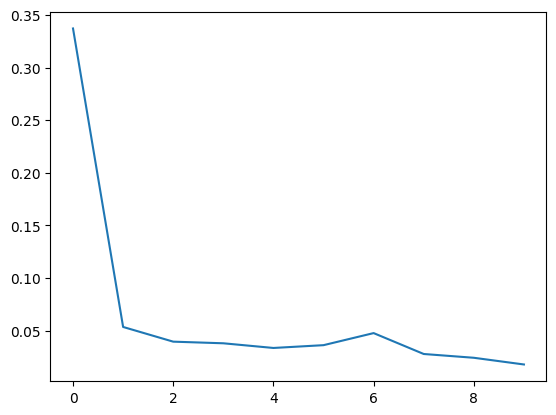

In [10]:
model = dc.models.CGCNNModel(mode='regression', batch_size=256, learning_rate=0.0008)

losses = []

for _ in tqdm(range(10), desc="Training"):
    loss = model.fit(train_dataset, nb_epoch=1)
    losses.append(loss)

plt.plot(losses)

Once fitting the model, we evaluate the performance of the model using mean squared error metric since it is a regression task. For selection a metric, `dc.metrics.mean_squared_error` function can be used and we evaluate the model by calling `dc.model.evaluate`.`

In [11]:
metric = dc.metrics.Metric(dc.metrics.mean_absolute_error)
print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

Training set score: {'mean_absolute_error': 0.1310973839991837}
Test set score: {'mean_absolute_error': 0.13470105945654667}


The original paper achieved a MAE of 0.130 eV/atom on the same dataset (with a 60:20:20 split, instead of the 80:10:10 being used in this tutorial). 

## Further Reading <a class="anchor" id="further-reading"></a>

For further reading on getting started on using machine learning for material science, here are two great resources:
- [Getting Started in Material Informatics](https://towardsdatascience.com/getting-started-in-materials-informatics-41ee34d5ccfe)
- [A Collection of Open Source Material Informatics Resources](https://github.com/ncfrey/resources)

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Gitter
The DeepChem [Gitter](https://gitter.im/deepchem/Lobby) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!
